## 시각화 패키지 (matplotlib) 연습문제

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### 문제 1
- 다음의 데이터프레임을 사용하여 그림과 같이 개인별 몸무게를 수평 바 차트로 표현
- 몸무게 기준 내림차순 정렬

In [2]:
data = [
    [22, 60.1, 170.5, '남', '서울'],
    [45, 51.3, 160.5, '여', '부산'],
    [23, 88.1, 175.5, '남', '대구'],
    [33, 60.1, 180.5, '남', '제주'],
    [40, 60.1, 173.5, '남', '강릉']    
]

columns = ['나이', '몸무게', '키', '성별', '주소']
index = ['홍길동', '성춘향', '이몽룡', '변학도', '강길동']

df1 = pd.DataFrame(data, index=index, columns=columns)

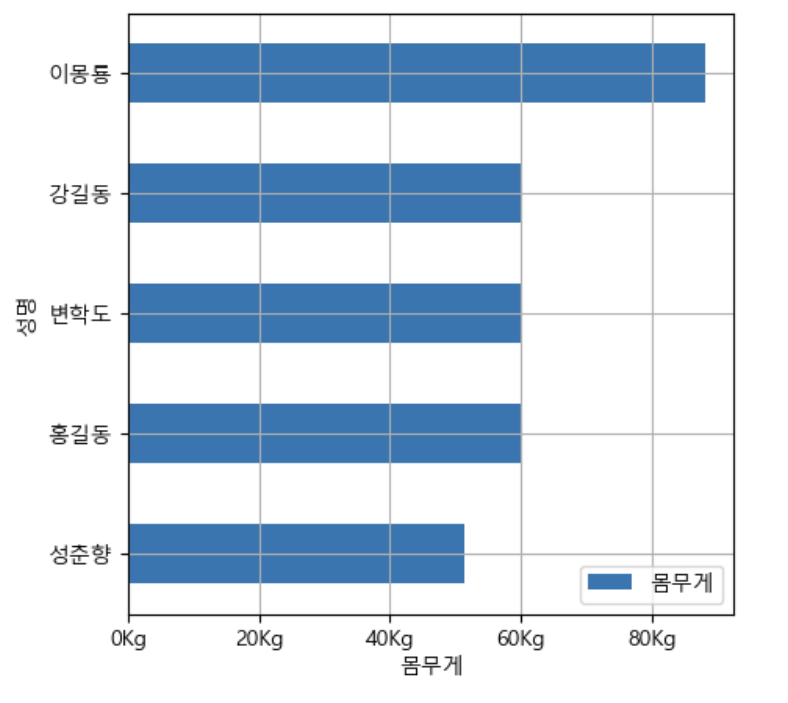

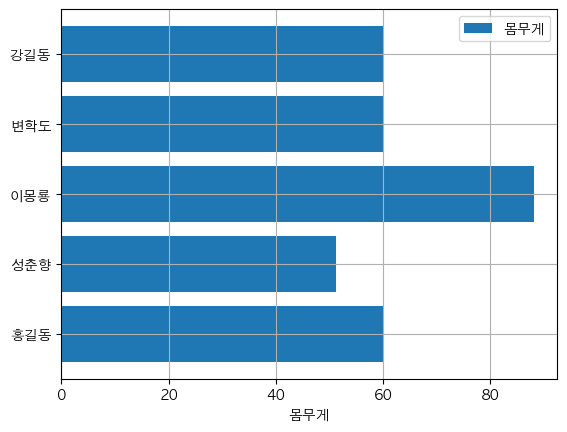

In [3]:
plt.barh(df1.index, df1['몸무게'], label='몸무게')
plt.legend()
plt.xlabel('몸무게')
plt.grid(True)
plt.show()

### 문제 2
- 다음의 데이터프레임을 사용하여 그림과 같이 도시별로 연도에 따른 인구수 변화를 라인 차트로 표현

In [4]:
## 데이터프레임으로 line plot 그리기
data = {
    '지역':['수도권', '경상권', '수도권', '경상권'],
    "2015": [7004312, 3548737, 3390451, 2466052],
    "2010": [8531482, 2393191, 2632035, 2000002],
    "2005": [9462546, 3712547, 2817680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990]
}

# 행방향 인덱스 (index)
index = ['서울', '부산', '인천', '대구']

df2 = pd.DataFrame(data, index=index)

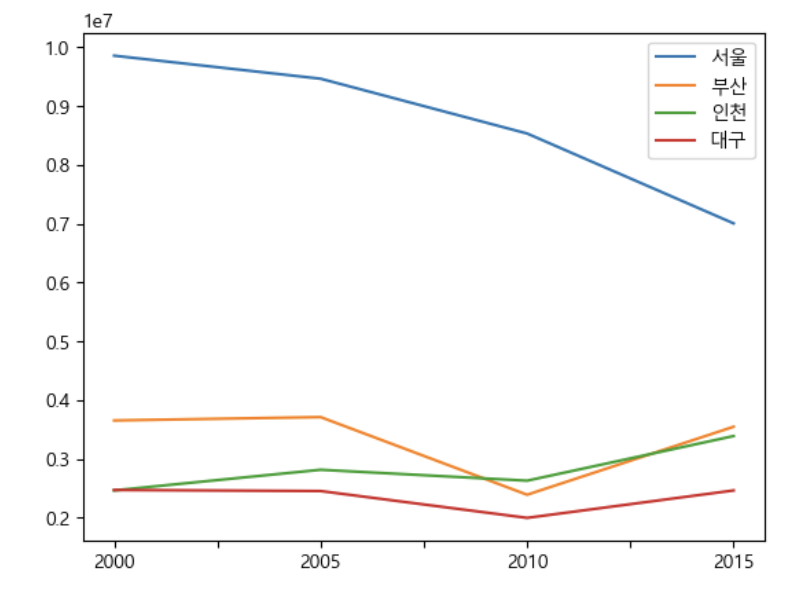

In [5]:
# years = df2.columns.drop('지역').sort_values() # ['2000', '2005', '2010', '2015']

# for city in index:
#     plt.plot(years, [df2.T[city][year] for year in years], label=city)

# plt.legend(ncol=1)
# plt.show()

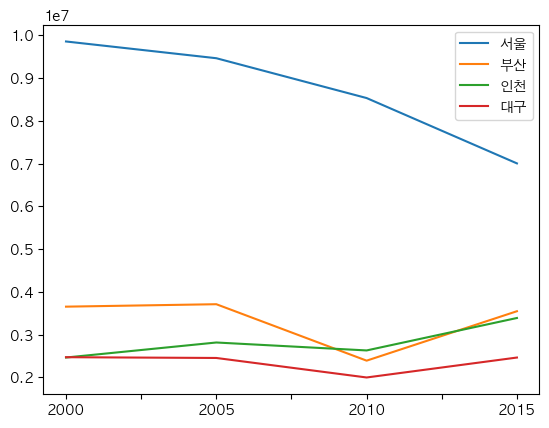

In [6]:
df2_sorted = df2.T.iloc[1:].sort_index()
df2_sorted.plot(kind='line')
plt.legend(ncol=1)
plt.show()

### 문제 3
- population_in_Seoul.csv 파일을 사용하여 그림과 같이 자치구별 65세이상고령자 수를 바 차트 표현

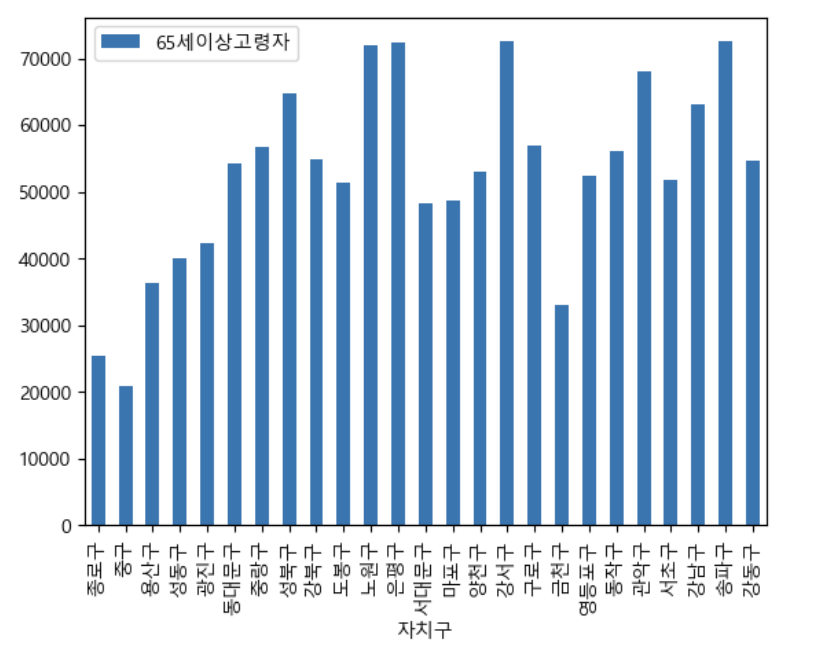

In [7]:
pops = pd.read_csv('population_in_Seoul.csv')
pops.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,"4,202,888","10,197,604","5,000,005","5,197,599","9,926,968","4,871,560","5,055,408","270,636","128,445","142,191",2.36,"1,321,458"
3,2017.1/4,종로구,"72,654","162,820","79,675","83,145","153,589","75,611","77,978","9,231","4,064","5,167",2.11,"25,425"
4,2017.1/4,중구,"59,481","133,240","65,790","67,450","124,312","61,656","62,656","8,928","4,134","4,794",2.09,"20,764"


In [8]:
# # 인덱스 3부터 사용하고 NaN은 버린다
# over_65 = pops[['자치구', '65세이상고령자']][3:].dropna()

# for i in over_65['65세이상고령자'].index:
#     over_65['65세이상고령자'][i] = int(over_65['65세이상고령자'][i].replace(',', '')) # 쉼표를 버리고 int로 바꿈

# over_65.set_index('자치구', inplace=True)
# over_65.plot(kind='bar')
# plt.show()

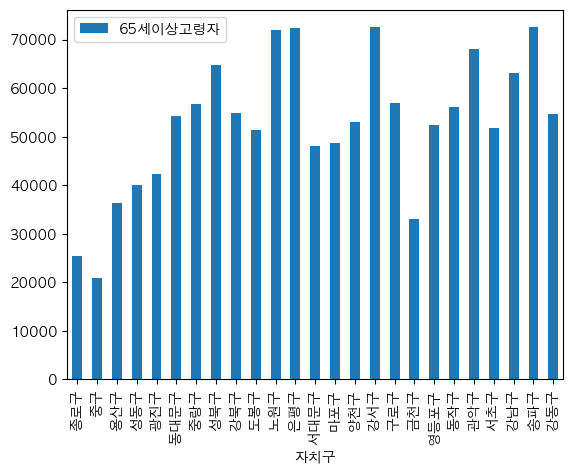

In [9]:
# 인덱스 3부터 사용하고 NaN은 버린다
over_65 = pops[['자치구', '65세이상고령자']][3:].dropna()

over_65['65세이상고령자'] = over_65['65세이상고령자'].apply(lambda x:int(str(x).replace(',', '')))

over_65.set_index('자치구', inplace=True)
over_65.plot(kind='bar')
plt.show()